In [14]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [15]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

# bdd 1

In [16]:
bdd = pd.read_csv("/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/summary/bdd_2023-09-11_cingulate_random_strategy.csv", index_col=0)
bdd = bdd.sort_values(by=['best_test_auc'], ascending=False)
bdd.head()

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss
32,/volatile2/jc225751/Runs/61_classifier_regress...,0.957837,0.615221,0.660317,0.738143,0.666448,0.606638,0.106164,0.896356,0.000806,94.871483
17,/volatile2/jc225751/Runs/61_classifier_regress...,0.980259,0.531260,0.626263,0.711972,0.690998,0.595671,0.176862,0.710536,0.000336,109.502365
28,/volatile2/jc225751/Runs/61_classifier_regress...,0.841887,0.490507,0.537374,0.570858,0.570540,0.595094,0.080388,0.966736,0.000852,122.463898
36,/volatile2/jc225751/Runs/61_classifier_regress...,0.662320,0.547954,0.579509,0.614440,0.575777,0.593074,0.154495,0.845074,0.000586,136.694061
9,/volatile2/jc225751/Runs/61_classifier_regress...,0.599289,0.603928,0.584993,0.601025,0.603601,0.570707,0.062310,0.766846,0.003970,137.172440


In [17]:
len(bdd)

41

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
32,/volatile2/jc225751/Runs/61_classifier_regress...,0.957837,0.615221,0.660317,0.738143,0.666448,0.606638,0.106164,0.896356,0.000806,94.871483,0.738797,1.112174,0.373377,-2.635343,-1.042376,-6.030015,-1.670554
17,/volatile2/jc225751/Runs/61_classifier_regress...,0.980259,0.531260,0.626263,0.711972,0.690998,0.595671,0.176862,0.710536,0.000336,109.502365,0.638977,1.386479,0.747502,-3.864483,-0.778707,-8.574832,-1.820331
28,/volatile2/jc225751/Runs/61_classifier_regress...,0.841887,0.490507,0.537374,0.570858,0.570540,0.595094,0.080388,0.966736,0.000852,122.463898,0.859237,1.370365,0.511127,-8.054763,-1.017827,-10.099148,-3.870033
36,/volatile2/jc225751/Runs/61_classifier_regress...,0.662320,0.547954,0.579509,0.614440,0.575777,0.593074,0.154495,0.845074,0.000586,136.694061,0.887108,1.018457,0.131349,-3.252871,-2.084529,-5.338551,-2.742014
9,/volatile2/jc225751/Runs/61_classifier_regress...,0.599289,0.603928,0.584993,0.601025,0.603601,0.570707,0.062310,0.766846,0.003970,137.172440,0.795375,0.796783,0.001408,-5.961494,-4.224094,-8.300749,-2.975448


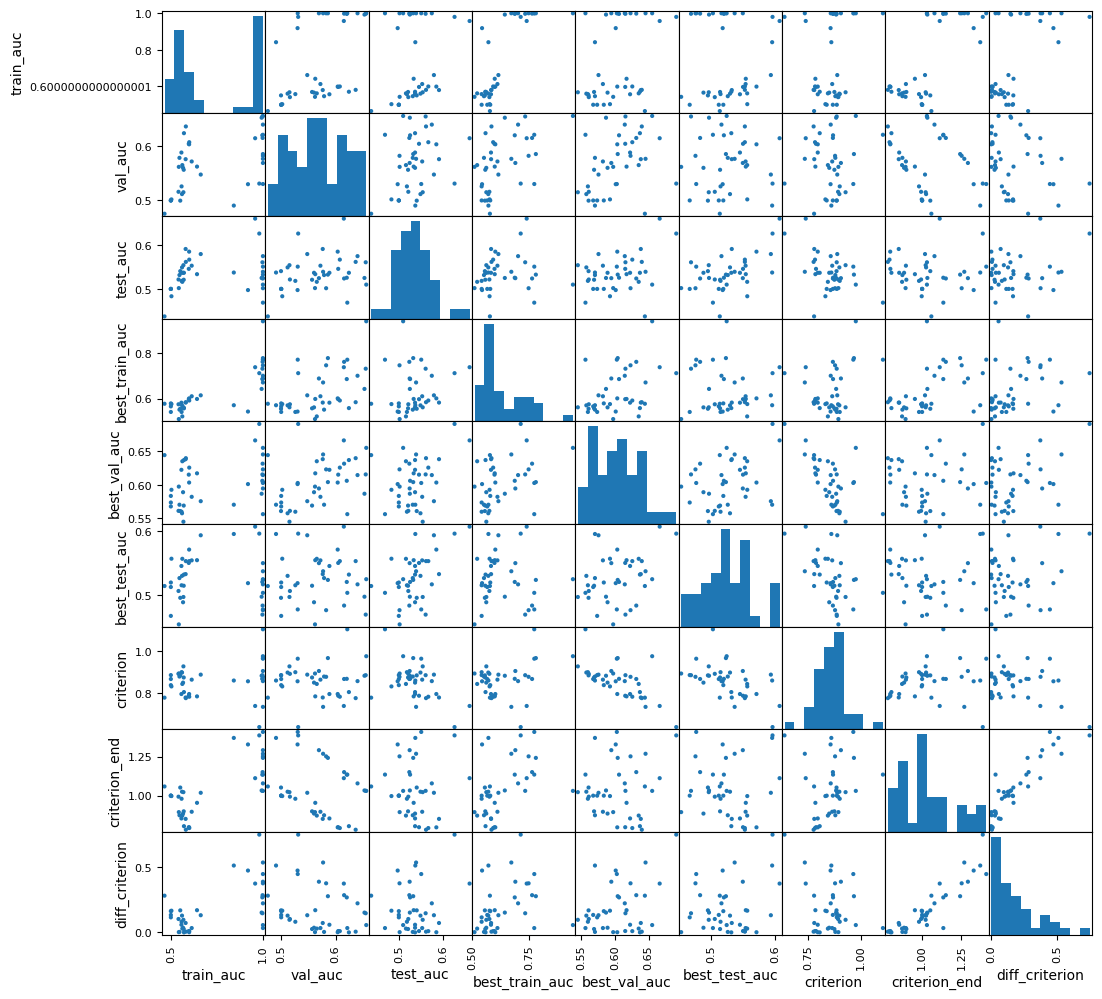

In [18]:
bdd["criterion"] = abs(bdd["best_val_auc"] - bdd["best_train_auc"]) + 2*(1-bdd["best_val_auc"])
bdd["criterion_end"] = abs(bdd["val_auc"] - bdd["train_auc"]) + 2*(1-bdd["val_auc"])
bdd["diff_criterion"] = abs(bdd["criterion"]-bdd["criterion_end"])
bdd["diff_best"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"]))
bdd["diff_end"] = np.log(abs(bdd["val_auc"] - bdd["train_auc"])+0.01)
bdd["criterion2"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"])) + np.log(0.7-bdd["best_val_auc"])
bdd["diff"] = np.log(abs(bdd["best_train_auc"] - 0.55))
obj = pd.plotting.scatter_matrix(bdd[['train_auc', 'val_auc', 'test_auc', 'best_train_auc', 'best_val_auc', 'best_test_auc', 'criterion', 'criterion_end', 'diff_criterion']],
                                 figsize=(12,12),
                                 alpha=1.0)
bdd.head()

In [19]:
bdd = bdd.sort_values(by=['criterion'], ascending=True)
print(bdd.head())
bdd.head()['model_path'].tolist()

                                           model_path  train_auc   val_auc  \
17  /volatile2/jc225751/Runs/61_classifier_regress...   0.980259  0.531260   
31  /volatile2/jc225751/Runs/61_classifier_regress...   1.000000  0.577087   
32  /volatile2/jc225751/Runs/61_classifier_regress...   0.957837  0.615221   
26  /volatile2/jc225751/Runs/61_classifier_regress...   0.581449  0.636989   
8   /volatile2/jc225751/Runs/61_classifier_regress...   0.465566  0.475450   

    test_auc  best_train_auc  best_val_auc  best_test_auc  drop_rate  \
17  0.626263        0.711972      0.690998       0.595671   0.176862   
31  0.539105        0.670996      0.645499       0.536797   0.117896   
32  0.660317        0.738143      0.666448       0.606638   0.106164   
26  0.561616        0.584183      0.639935       0.552670   0.135293   
8   0.437374        0.577355      0.644517       0.513709   0.068342   

       gamma        lr  train_loss  criterion  criterion_end  diff_criterion  \
17  0.710536  0.00

['/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_random_strategy/2023-09-11/22-49-50_29',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_random_strategy/2023-09-12/03-50-15_98',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_random_strategy/2023-09-12/04-26-35_87',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_random_strategy/2023-09-12/01-51-38_109',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_random_strategy/2023-09-11/19-49-32_182']

In [20]:
# bdd[bdd.model_path=='/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_bayes/13-07-08_157']

Text(0, 0.5, 'best_test_auc')

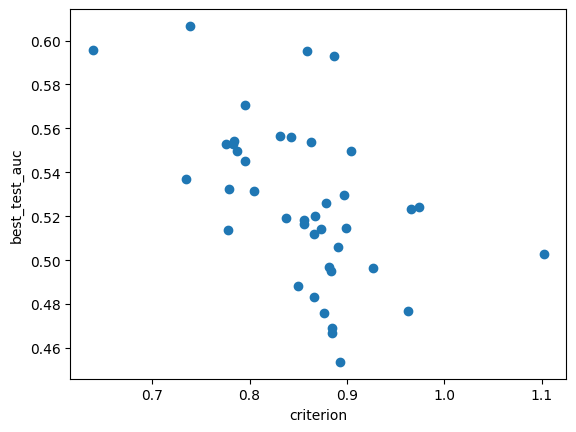

In [21]:
plt.scatter(bdd["criterion"], bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

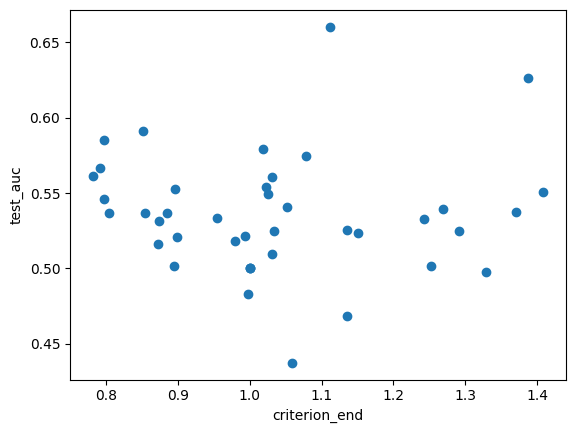

In [22]:
plt.scatter(bdd["criterion_end"], bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

In [23]:
quantile = []
test_auc = []
test_auc_cum = []
error_cum = []
error = []
delta=0.1
quantile_x = np.arange(delta,1+delta,delta)
print(quantile_x)
for q in quantile_x:
    one_quantile = bdd['criterion_end'].quantile(q=q)
    quantile.append(one_quantile)
    test_auc_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].mean())
    error_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].sem())
    if q==delta:
        test_auc.append(test_auc_cum[-1])
        error.append(error_cum[-1])
    else:
        test_auc.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].mean())
        error.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].sem())

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


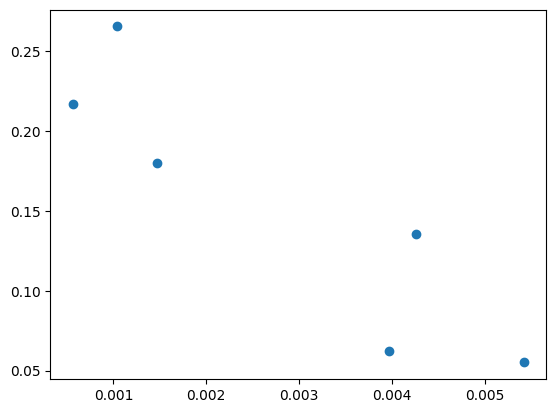

In [86]:
lim = bdd['criterion_end'].quantile(q=0.15)
bdd_lim = bdd[bdd.criterion_end < lim]
plt.plot(bdd_lim.lr, bdd_lim.drop_rate, linestyle='', marker='o')

(0.45, 0.6)

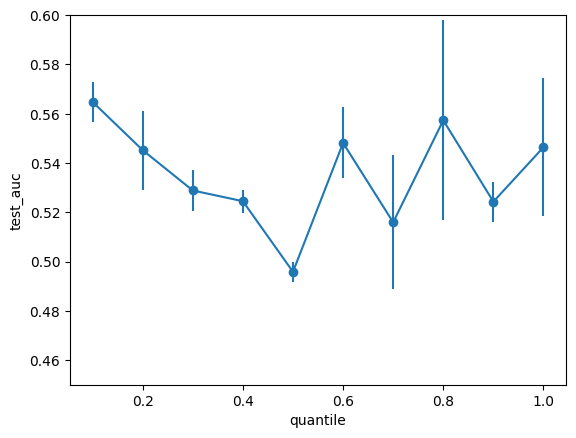

In [24]:
plt.errorbar(quantile_x, test_auc, error, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc")
plt.ylim((0.45,0.6))

(0.45, 0.6)

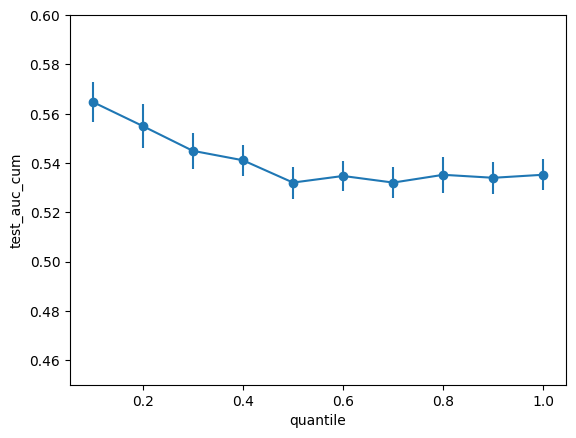

In [25]:
plt.errorbar(quantile_x, test_auc_cum, error_cum, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc_cum")
plt.ylim((0.45,0.6))

Text(0, 0.5, 'test_auc')

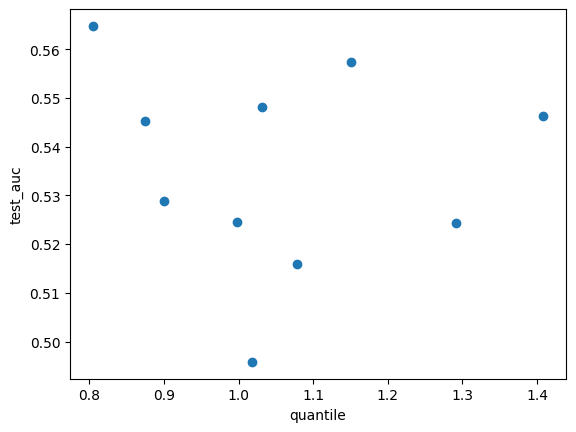

In [26]:
plt.scatter(quantile, test_auc)
plt.xlabel("quantile")
plt.ylabel("test_auc")

In [77]:
bdd.sort_values(by=['criterion'], ascending=True).head()['model_path'].tolist()

['/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_random_strategy/2023-09-11/22-49-50_29',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_random_strategy/2023-09-12/03-50-15_98',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_random_strategy/2023-09-12/04-26-35_87',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_random_strategy/2023-09-12/01-51-38_109',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_random_strategy/2023-09-11/19-49-32_182']

In [81]:
bdd.sort_values(by=['criterion'], ascending=True).iloc[0]

model_path        /volatile2/jc225751/Runs/61_classifier_regress...
train_auc                                                  0.980259
val_auc                                                     0.53126
test_auc                                                   0.626263
best_train_auc                                             0.711972
best_val_auc                                               0.690998
best_test_auc                                              0.595671
drop_rate                                                  0.176862
gamma                                                      0.710536
lr                                                         0.000336
train_loss                                               109.502365
criterion                                                  0.638977
criterion_end                                              1.386479
diff_criterion                                             0.747502
diff_best                                       

Text(0, 0.5, 'best_test_auc')

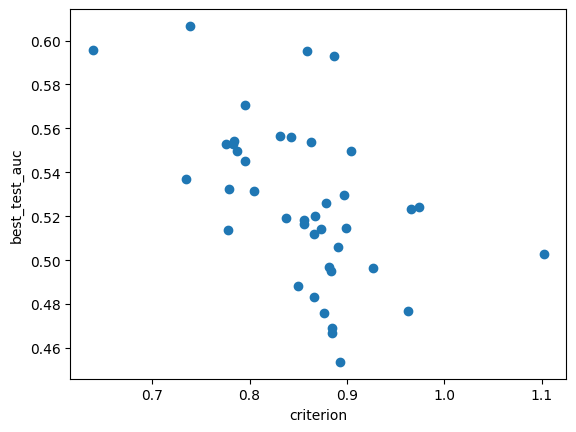

In [27]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

In [28]:
best_quantile = []
best_test_auc = []
for q in quantile_x:
    one_quantile = bdd['criterion'].quantile(q=q)
    best_quantile.append(one_quantile)
    best_test_auc.append(bdd[bdd['criterion'] < one_quantile]['best_test_auc'].mean())

Text(0, 0.5, 'best_test_auc')

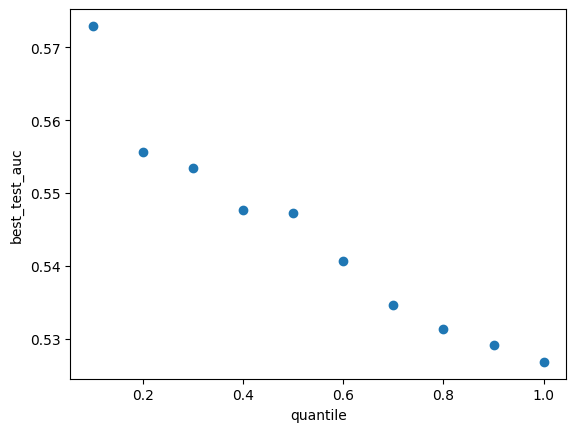

In [29]:
plt.scatter(quantile_x, best_test_auc)
plt.xlabel("quantile")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'val_auc')

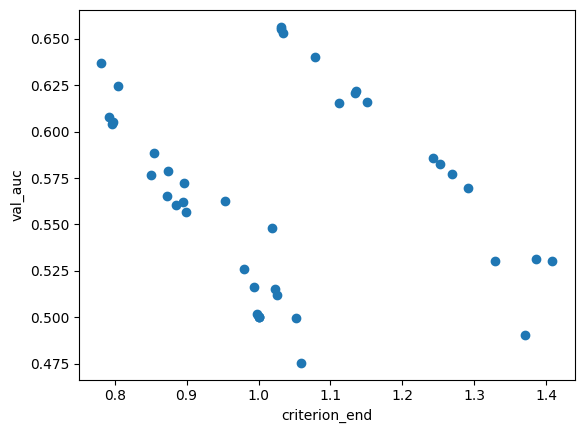

In [30]:
plt.scatter(bdd["criterion_end"], bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")

Text(0, 0.5, 'train_auc')

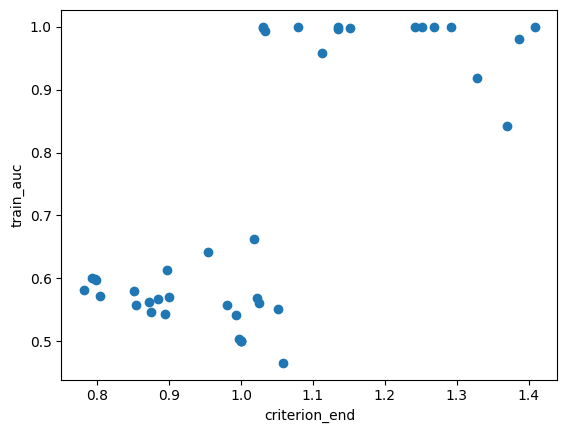

In [31]:
plt.scatter(bdd["criterion_end"], bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")

In [32]:
bdd.sort_values(by=['test_auc'], ascending=False)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
32,/volatile2/jc225751/Runs/61_classifier_regress...,0.957837,0.615221,0.660317,0.738143,0.666448,0.606638,0.106164,0.896356,0.000806,94.871483,0.738797,1.112174,0.373377,-2.635343,-1.042376,-6.030015,-1.670554
17,/volatile2/jc225751/Runs/61_classifier_regress...,0.980259,0.531260,0.626263,0.711972,0.690998,0.595671,0.176862,0.710536,0.000336,109.502365,0.638977,1.386479,0.747502,-3.864483,-0.778707,-8.574832,-1.820331
39,/volatile2/jc225751/Runs/61_classifier_regress...,0.580322,0.576432,0.591053,0.582583,0.638462,0.532323,0.179990,0.977495,0.001475,138.568161,0.778955,0.851026,0.072071,-2.884582,-4.276563,-5.672675,-3.423952
9,/volatile2/jc225751/Runs/61_classifier_regress...,0.599289,0.603928,0.584993,0.601025,0.603601,0.570707,0.062310,0.766846,0.003970,137.172440,0.795375,0.796783,0.001408,-5.961494,-4.224094,-8.300749,-2.975448
36,/volatile2/jc225751/Runs/61_classifier_regress...,0.662320,0.547954,0.579509,0.614440,0.575777,0.593074,0.154495,0.845074,0.000586,136.694061,0.887108,1.018457,0.131349,-3.252871,-2.084529,-5.338551,-2.742014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,/volatile2/jc225751/Runs/61_classifier_regress...,0.500000,0.500000,0.500000,0.578948,0.583633,0.519192,0.071297,0.877633,0.006375,138.658066,0.837419,1.000000,0.162581,-5.363256,-4.605170,-7.514266,-3.542262
23,/volatile2/jc225751/Runs/61_classifier_regress...,0.918821,0.530115,0.497403,0.543064,0.601309,0.518182,0.061450,0.795545,0.002921,101.983566,0.855626,1.328478,0.472851,-2.843099,-0.919529,-5.158864,-4.971097
22,/volatile2/jc225751/Runs/61_classifier_regress...,0.503268,0.501964,0.483261,0.575913,0.592799,0.556421,0.092301,0.944369,0.001862,138.632050,0.831288,0.997376,0.166087,-4.081291,-4.482635,-6.314338,-3.653009
3,/volatile2/jc225751/Runs/61_classifier_regress...,1.000000,0.621604,0.468687,0.771217,0.556465,0.503030,0.099140,0.818055,0.000115,95.475739,1.101822,1.135188,0.033366,-1.538272,-0.945730,-3.479447,-1.508612


Text(0, 0.5, 'best_test_auc')

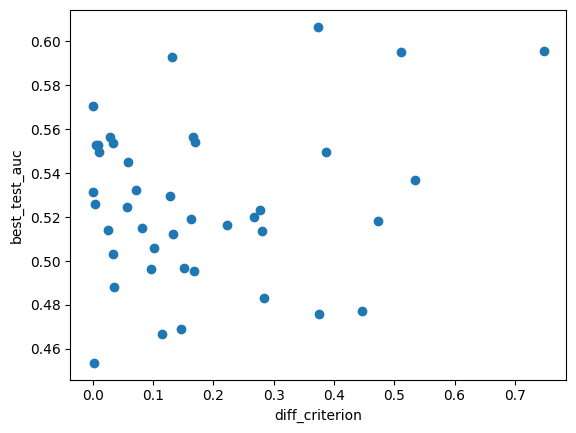

In [33]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

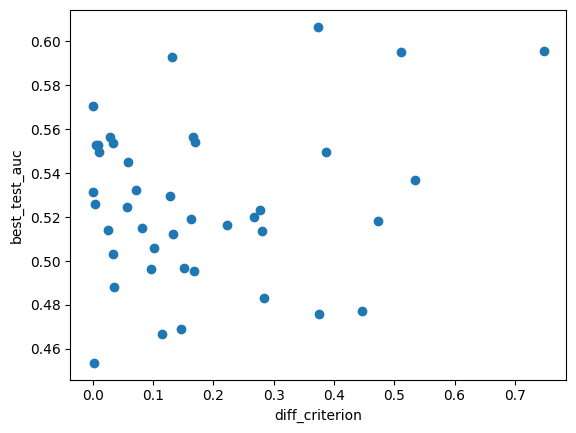

In [34]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

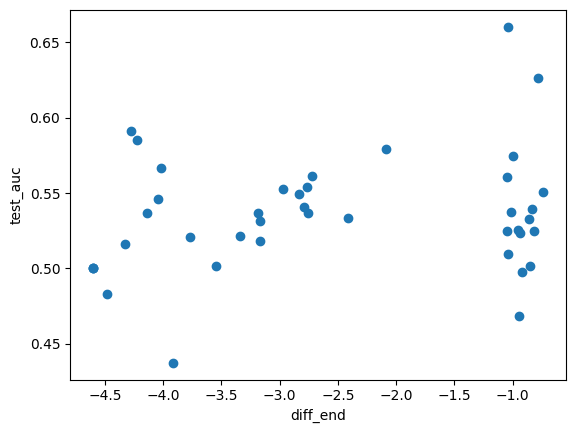

In [35]:
plt.scatter(bdd["diff_end"], bdd.test_auc)
plt.xlabel("diff_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

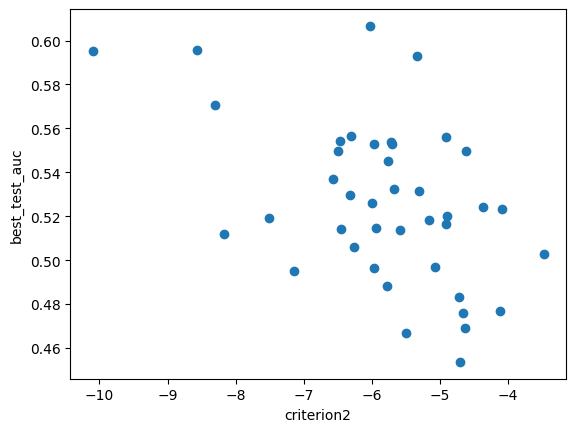

In [36]:
plt.scatter(bdd["criterion2"], bdd.best_test_auc)
plt.xlabel("criterion2")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

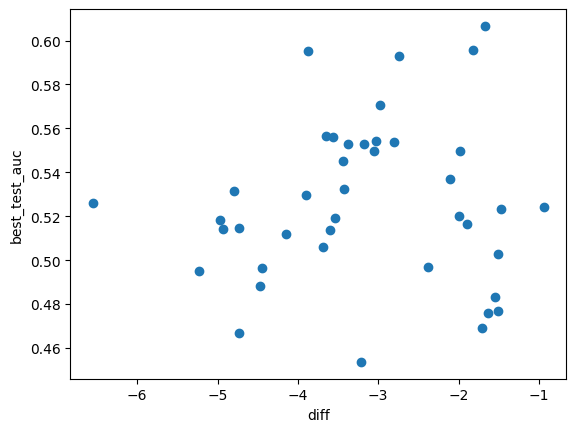

In [37]:
plt.scatter(bdd["diff"], bdd.best_test_auc)
plt.xlabel("diff")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

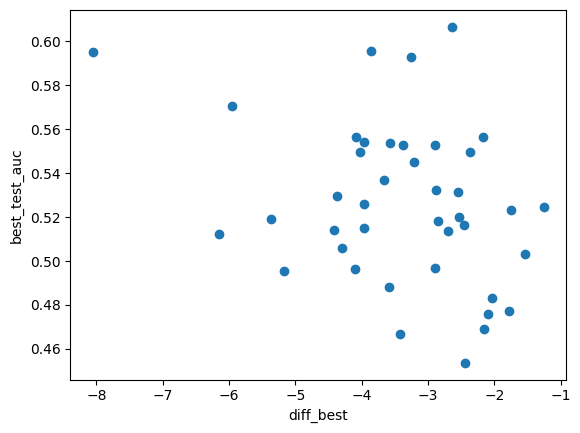

In [38]:
plt.scatter(bdd["diff_best"], bdd.best_test_auc)
plt.xlabel("diff_best")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

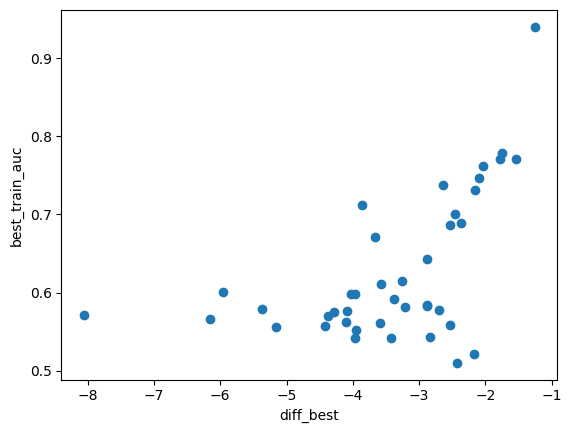

In [39]:
plt.scatter(bdd["diff_best"], bdd.best_train_auc)
plt.xlabel("diff_best")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_test_auc')

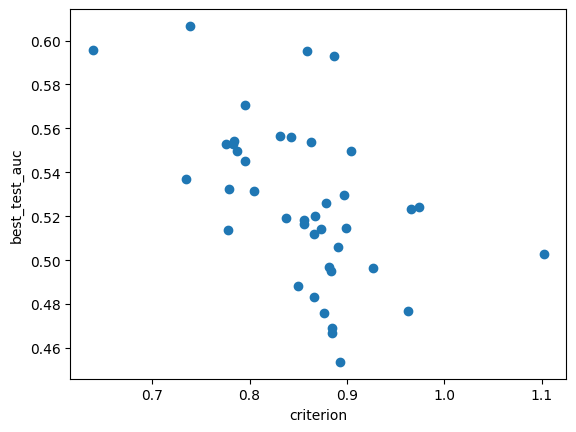

In [40]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_val_auc')

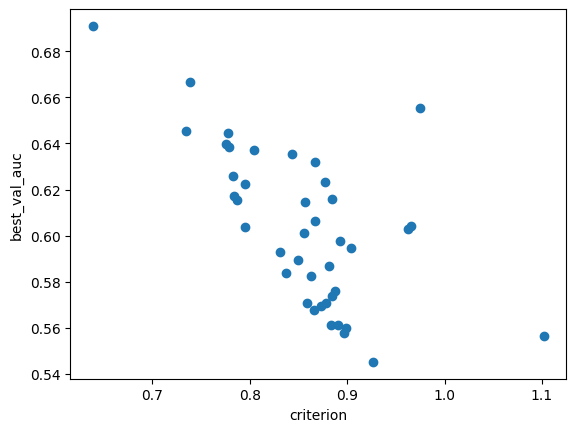

In [41]:
plt.scatter(bdd.criterion, bdd.best_val_auc)
plt.xlabel("criterion")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'best_train_auc')

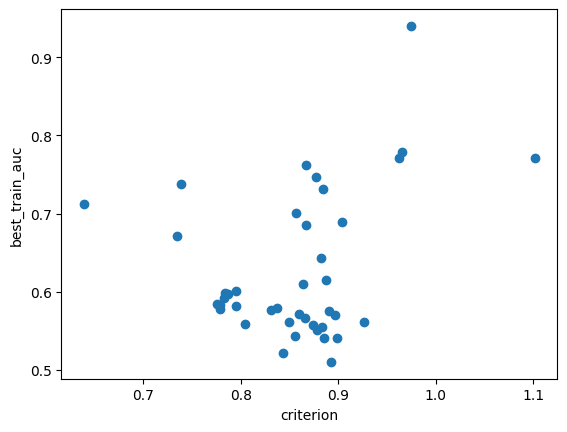

In [42]:
plt.scatter(bdd.criterion, bdd.best_train_auc)
plt.xlabel("criterion")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_test_auc')

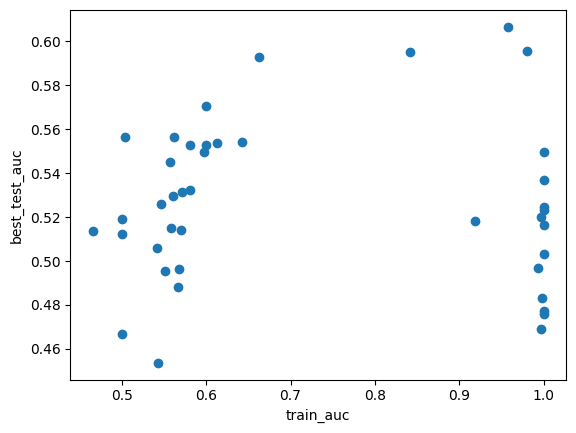

In [43]:
plt.scatter(bdd.train_auc, bdd.best_test_auc)
plt.xlabel("train_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

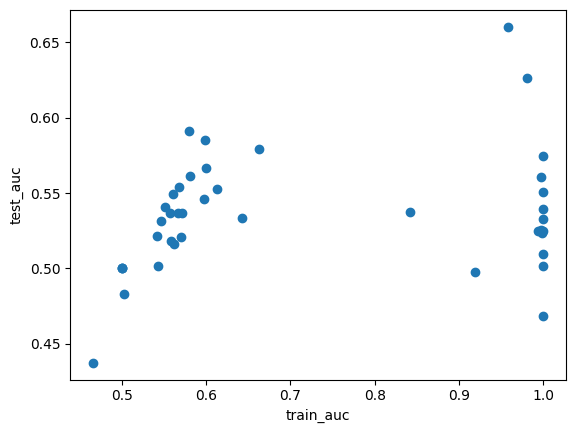

In [44]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

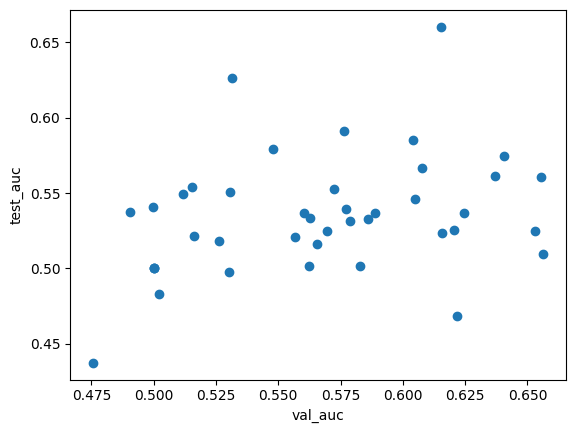

In [45]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

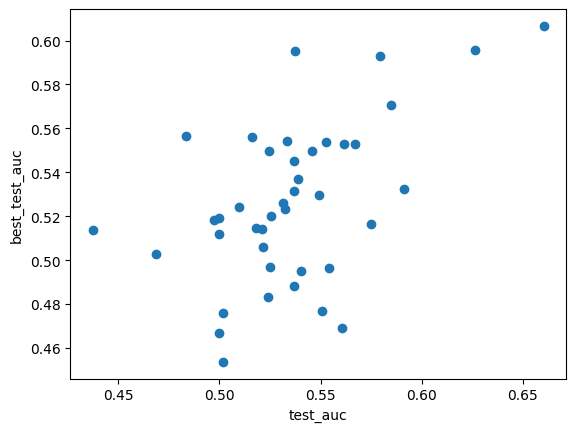

In [46]:
plt.scatter(bdd.test_auc, bdd.best_test_auc)
plt.xlabel("test_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

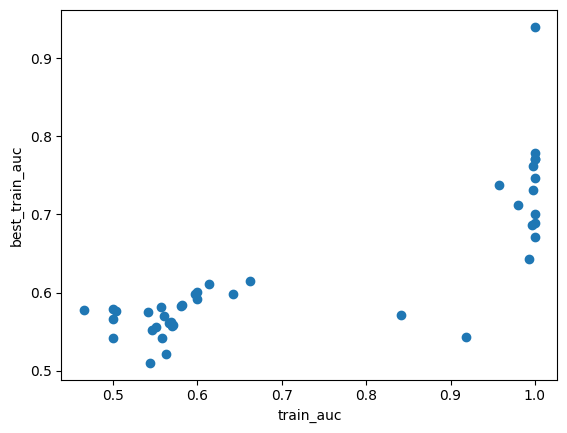

In [47]:
plt.scatter(bdd.train_auc, bdd.best_train_auc)
plt.xlabel("train_auc")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_val_auc')

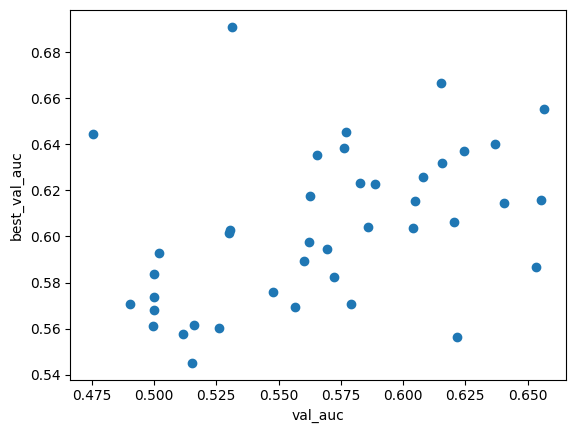

In [48]:
plt.scatter(bdd.val_auc, bdd.best_val_auc)
plt.xlabel("val_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'test_auc')

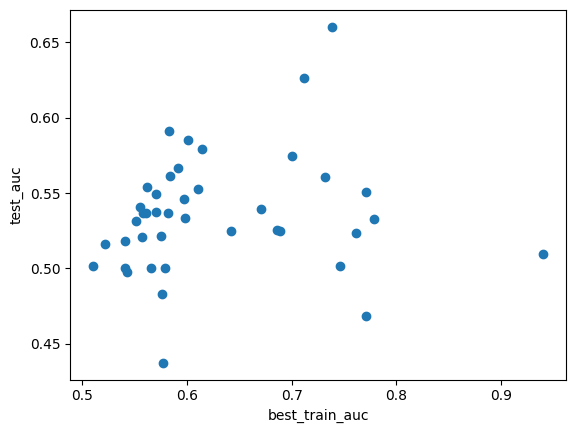

In [49]:
plt.scatter(bdd.best_train_auc, bdd.test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_val_auc')

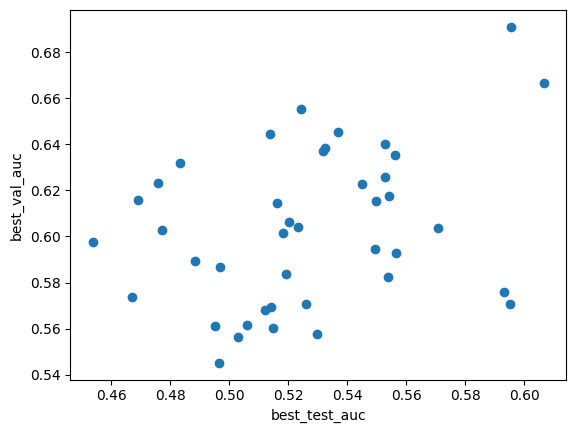

In [50]:
plt.scatter(bdd.best_test_auc, bdd.best_val_auc)
plt.xlabel("best_test_auc")
plt.ylabel("best_val_auc")

(0.4, 0.65)

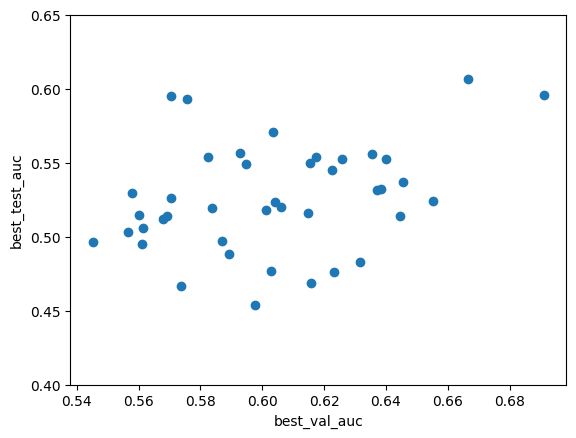

In [51]:
plt.scatter(bdd.best_val_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

(0.4, 0.65)

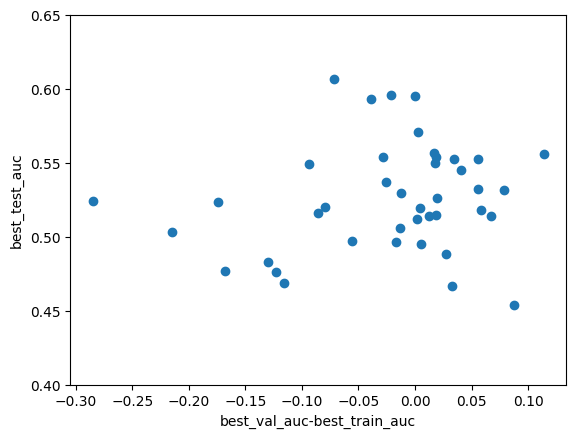

In [52]:
plt.scatter(bdd.best_val_auc-bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc-best_train_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

Text(0, 0.5, 'best_test_auc')

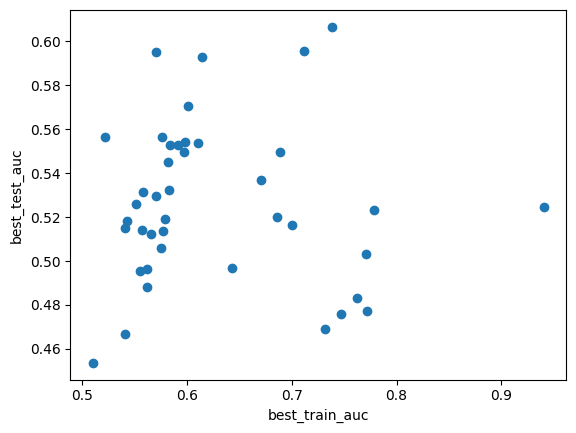

In [53]:
plt.scatter(bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_val_auc')

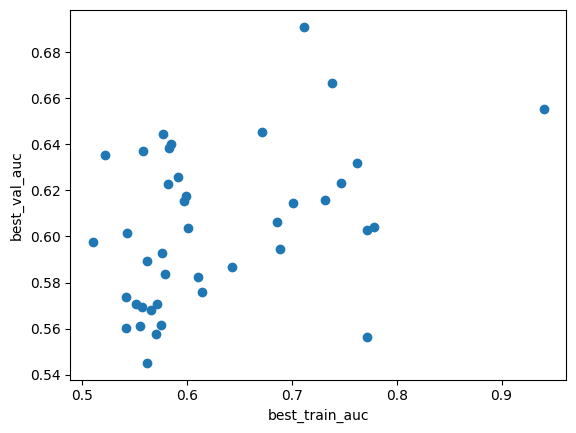

In [54]:
plt.scatter(bdd.best_train_auc, bdd.best_val_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'criterion')

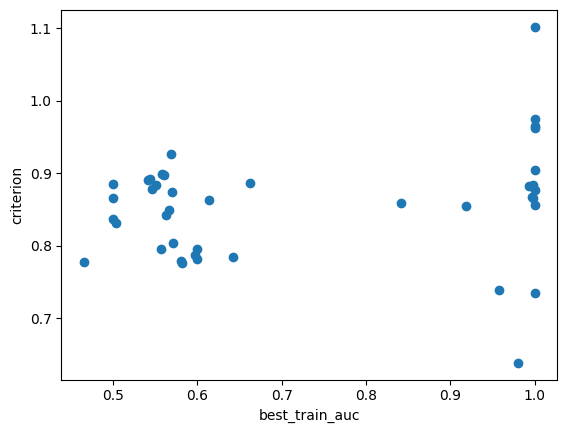

In [55]:
plt.scatter(bdd.train_auc, bdd.criterion)
plt.xlabel("best_train_auc")
plt.ylabel("criterion")

(0.7, 0.8)

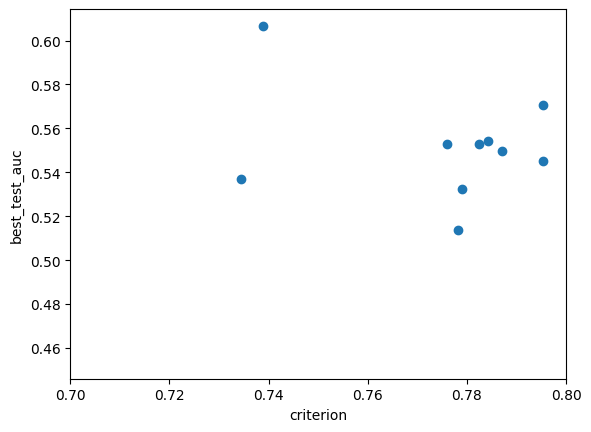

In [56]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")
plt.xlim((0.7,0.8))

(0.75, 0.9)

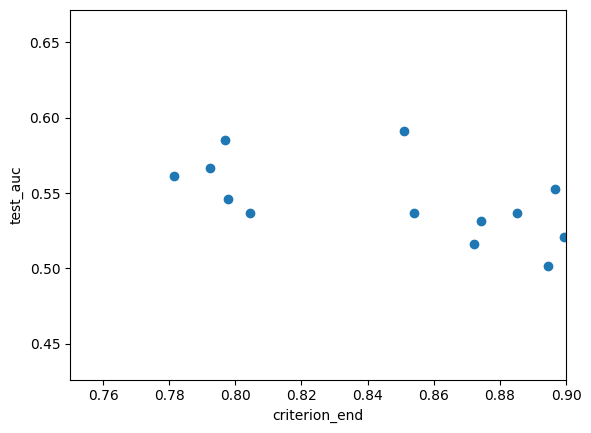

In [57]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
plt.xlim((0.75,0.9))

Text(0, 0.5, 'best_test_auc')

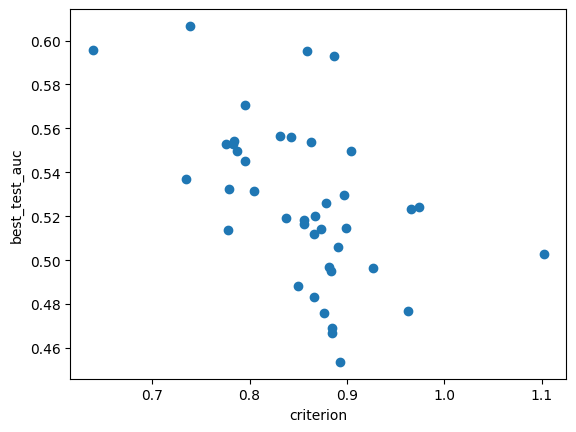

In [58]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

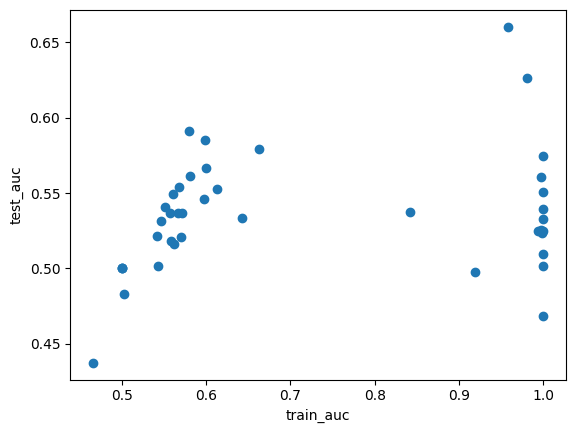

In [59]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

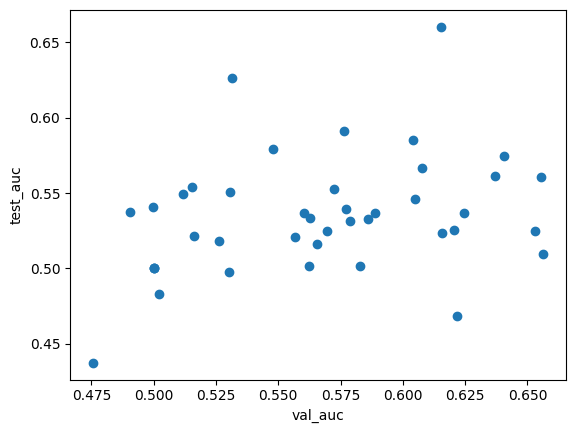

In [60]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

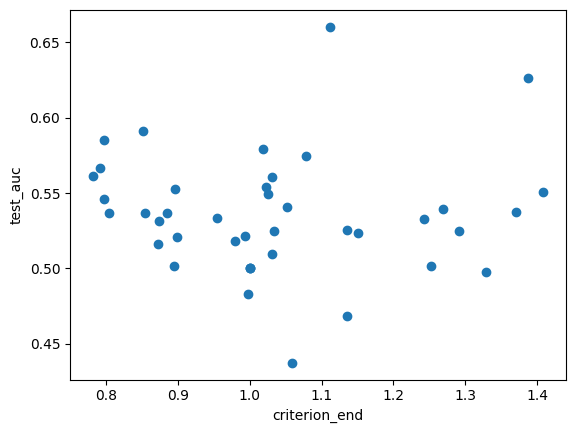

In [61]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

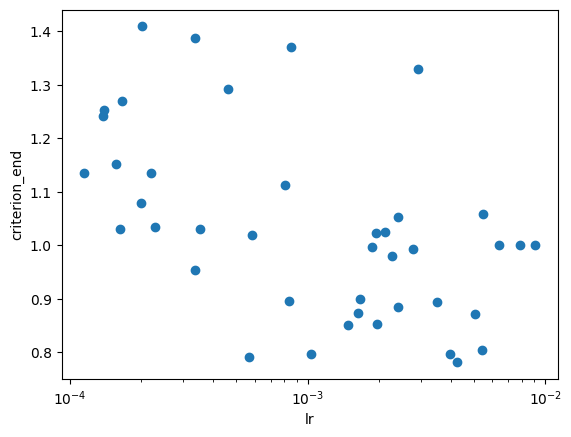

In [62]:
plt.scatter(bdd.lr, bdd.criterion_end)
plt.xlabel("lr")
plt.ylabel("criterion_end")
plt.xscale("log")

Text(0, 0.5, 'criterion_end')

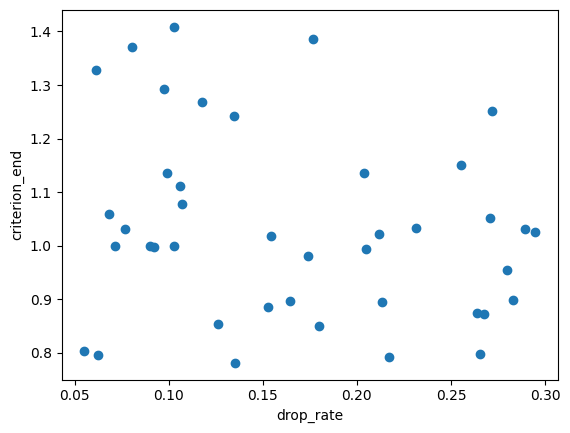

In [63]:
plt.scatter(bdd.drop_rate, bdd.criterion_end)
plt.xlabel("drop_rate")
plt.ylabel("criterion_end")

/tmp/ipykernel_1889176/1393031548.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


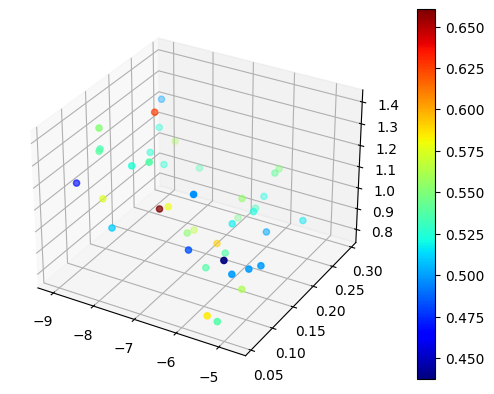

In [64]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
z = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
scat = ax.scatter(np.log(bdd.lr), bdd.drop_rate, z, c=scalarMap.to_rgba(cs))
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_1889176/3606356904.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


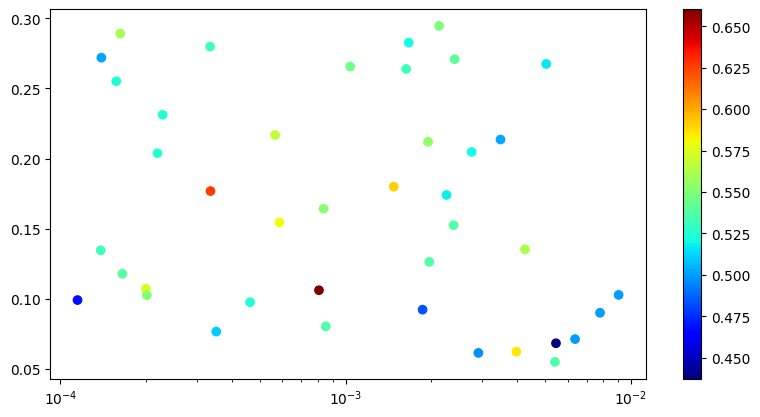

In [65]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_1889176/295477420.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


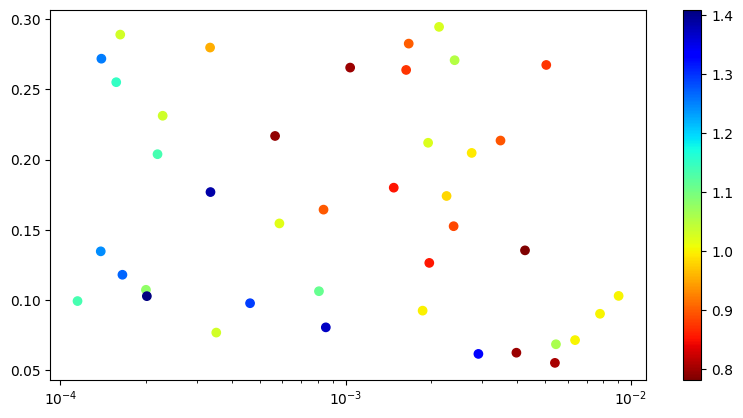

In [66]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet_r'
cm = plt.get_cmap(colorsMap)
cs = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

Text(0, 0.5, 'criterion_end')

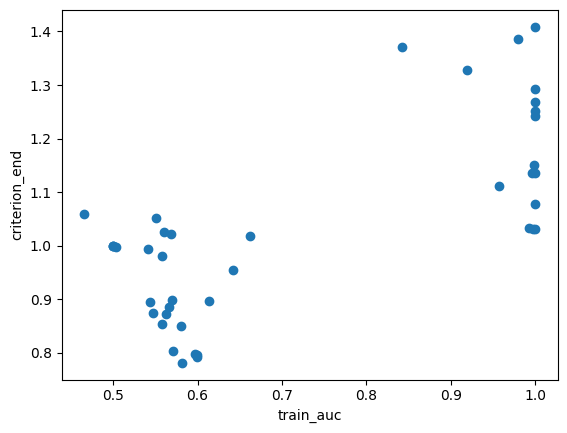

In [67]:
plt.scatter(bdd.train_auc, bdd.criterion_end)
plt.xlabel("train_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'val_auc')

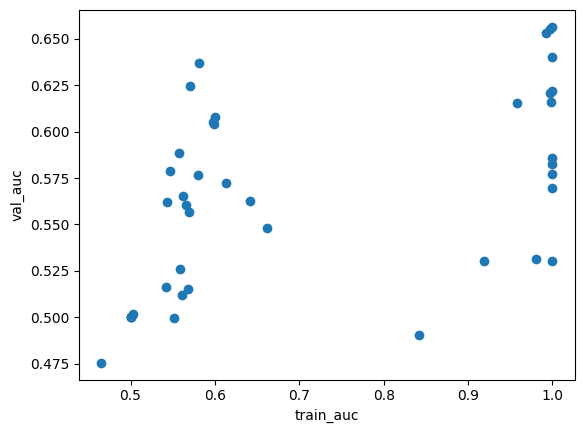

In [68]:
plt.scatter(bdd.train_auc, bdd.val_auc)
plt.xlabel("train_auc")
plt.ylabel("val_auc")

Text(0, 0.5, 'test_auc')

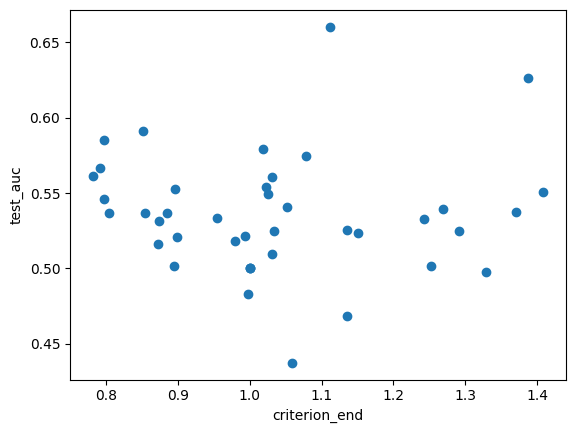

In [69]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'val_auc')

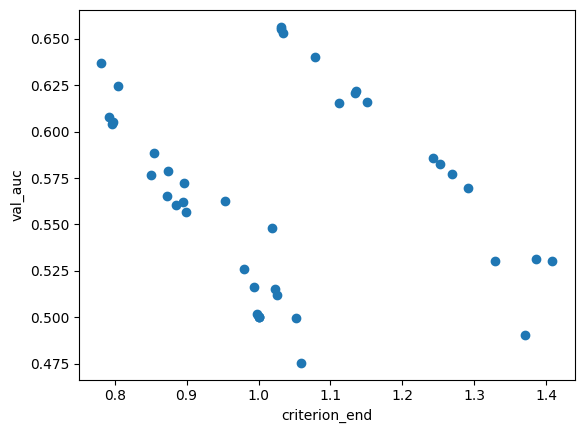

In [70]:
plt.scatter(bdd.criterion_end, bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")

Text(0, 0.5, 'train_auc')

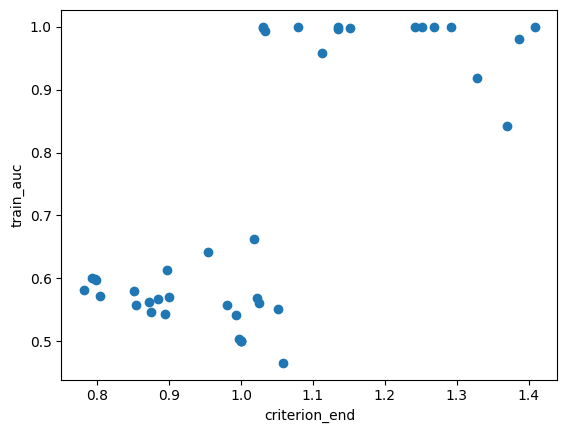

In [71]:
plt.scatter(bdd.criterion_end, bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")

In [72]:
bdd.sort_values(by=['criterion_end'], ascending=True)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
26,/volatile2/jc225751/Runs/61_classifier_regress...,0.581449,0.636989,0.561616,0.584183,0.639935,0.552670,0.135293,0.734206,0.004256,137.700089,0.775882,0.781562,0.005680,-2.886858,-2.725104,-5.699178,-3.376015
2,/volatile2/jc225751/Runs/61_classifier_regress...,0.599898,0.607856,0.566811,0.591620,0.625859,0.552670,0.216869,0.742398,0.000566,137.565521,0.782521,0.792246,0.009725,-3.374382,-4.019712,-5.976172,-3.179175
9,/volatile2/jc225751/Runs/61_classifier_regress...,0.599289,0.603928,0.584993,0.601025,0.603601,0.570707,0.062310,0.766846,0.003970,137.172440,0.795375,0.796783,0.001408,-5.961494,-4.224094,-8.300749,-2.975448
18,/volatile2/jc225751/Runs/61_classifier_regress...,0.597404,0.604910,0.545743,0.597479,0.615385,0.549784,0.265621,0.886020,0.001037,138.323944,0.787136,0.797686,0.010550,-4.022645,-4.045210,-6.492285,-3.047466
12,/volatile2/jc225751/Runs/61_classifier_regress...,0.571091,0.624550,0.536797,0.558246,0.637152,0.531602,0.055055,0.855080,0.005419,138.669540,0.804602,0.804360,0.000243,-2.539490,-2.757355,-5.306529,-4.798079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,/volatile2/jc225751/Runs/61_classifier_regress...,1.000000,0.569394,0.524531,0.688566,0.594763,0.549495,0.097600,0.801081,0.000462,68.818718,0.904278,1.291817,0.387539,-2.366558,-0.819605,-4.618095,-1.976411
23,/volatile2/jc225751/Runs/61_classifier_regress...,0.918821,0.530115,0.497403,0.543064,0.601309,0.518182,0.061450,0.795545,0.002921,101.983566,0.855626,1.328478,0.472851,-2.843099,-0.919529,-5.158864,-4.971097
28,/volatile2/jc225751/Runs/61_classifier_regress...,0.841887,0.490507,0.537374,0.570858,0.570540,0.595094,0.080388,0.966736,0.000852,122.463898,0.859237,1.370365,0.511127,-8.054763,-1.017827,-10.099148,-3.870033
17,/volatile2/jc225751/Runs/61_classifier_regress...,0.980259,0.531260,0.626263,0.711972,0.690998,0.595671,0.176862,0.710536,0.000336,109.502365,0.638977,1.386479,0.747502,-3.864483,-0.778707,-8.574832,-1.820331


Text(0, 0.5, 'criterion_end')

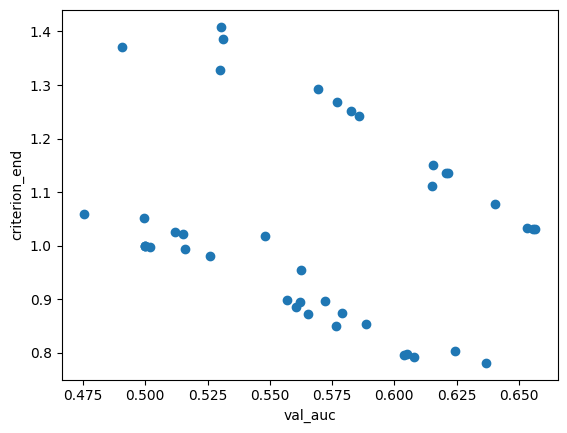

In [73]:
plt.scatter(bdd.val_auc, bdd.criterion_end)
plt.xlabel("val_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'test_auc')

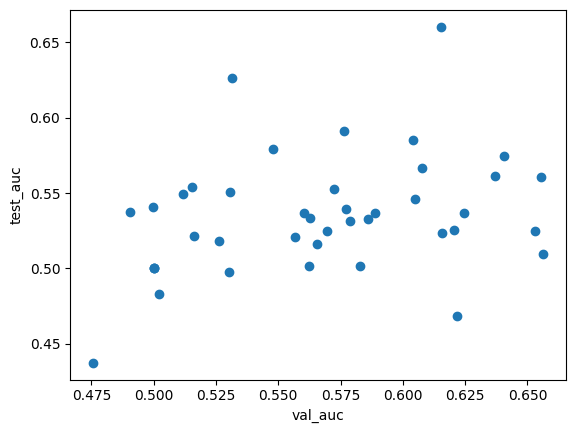

In [74]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")